In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def create_vector(a,b,step):
    new_vec = []
    curr_val = a
    while curr_val < b:
        new_vec.append(curr_val)
        curr_val += step
        
    return new_vec

var('t')
T = create_vector(0,2*pi,0.01)

d_dt = lambda a : diff(a,t)

D = lambda Q : vector([d_dt(x_i) for x_i in Q])

def T_vec(x):
    
    V = D(x)
    
    t_vec = V / V.norm()
    
    return t_vec.simplify_full() 

def N_vec(x):
    
    J = matrix([[0,-1],[1,0]])
    V = D(x)
    speed = V.norm()
    
    return (J * V / speed).simplify_full()

def angle(u,v): 
    
    return arccos(u.dot_product(v) / ( u.norm() * v.norm() ))

def signed_curvature(x):
    
    V = D(x)
    A = D(V)
    speed = V.norm()
    
    kappa = (V[0] * A[1] - A[0] * V[1]) / speed^3
    
    return kappa

def rotation_index(x,t_0,t_1):
        
    integral_expr = signed_curvature(x)*D(x).norm()
    
    def integrand(z):
        
        return integral_expr.subs(t = z, hold=False)
    
    return integrate.quad(integrand, t_0, t_1)[0] / (2 * float(pi))

def evolute(x):
    
    return x + N_vec(x) / signed_curvature(x)

## Drawing Planar Curves

In [2]:
a = 1
b = 0.5

def planar_curve(s):
    
    # return vector([cos(s), sin(3 * s)])
    
    return vector([a/2 + b*cos(s) + a/2*cos(2*s), b*sin(s) + a/2 * sin(2 * s)])

In [3]:
X = planar_curve(t)

In [4]:
X

(1/2*cos(2*t) + 0.500000000000000*cos(t) + 1/2, 1/2*sin(2*t) + 0.500000000000000*sin(t))

In [5]:
t0 = -pi
t1 = pi
nSamples = 200

In [6]:
curve =  np.array(list(map(planar_curve,create_vector(t0,t1,(t1-t0)/nSamples)))) 

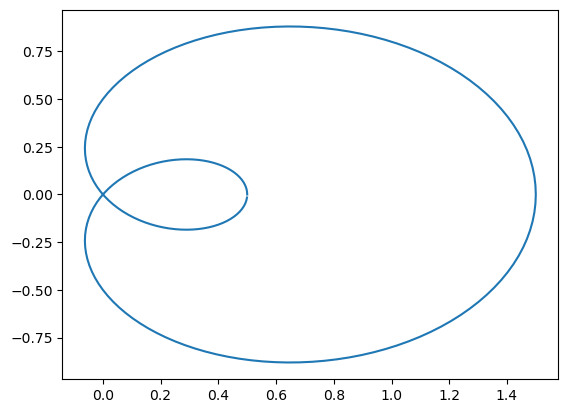

In [7]:
plt.plot(curve[:,0], curve[:,1])

## Evolute of a Planar Curve

In [8]:
Y = evolute(X)

In [9]:
Y

(-(abs(cos(2*t) + 0.500000000000000*cos(t))^2 + abs(-sin(2*t) - 0.500000000000000*sin(t))^2)^(3/2)*(4*cos(t)^2 + cos(t) - 2)/(((2*cos(2*t) + 0.500000000000000*cos(t))*(cos(2*t) + 0.500000000000000*cos(t)) + (2*sin(2*t) + 0.500000000000000*sin(t))*(sin(2*t) + 0.500000000000000*sin(t)))*sqrt(4*cos(t) + 5)) + 1/2*cos(2*t) + 0.500000000000000*cos(t) + 1/2, -(abs(cos(2*t) + 0.500000000000000*cos(t))^2 + abs(-sin(2*t) - 0.500000000000000*sin(t))^2)^(3/2)*(4.0*cos(t) + 1.0)*sin(t)/(((2*cos(2*t) + 0.500000000000000*cos(t))*(cos(2*t) + 0.500000000000000*cos(t)) + (2*sin(2*t) + 0.500000000000000*sin(t))*(sin(2*t) + 0.500000000000000*sin(t)))*sqrt(4*cos(t) + 5)) + 1/2*sin(2*t) + 0.500000000000000*sin(t))

In [10]:
def evolute_function_handle(x) :
    
    return Y.subs(t = x, hold=False)

In [11]:
curve =  np.array(list(map(planar_curve,create_vector(t0,t1,(t1-t0)/nSamples)))) 
evolute_curve = np.array(list(map(evolute_function_handle,create_vector(t0,t1,(t1-t0)/nSamples)))) 

(-1.8800367553350505, 1.8800367553350505)

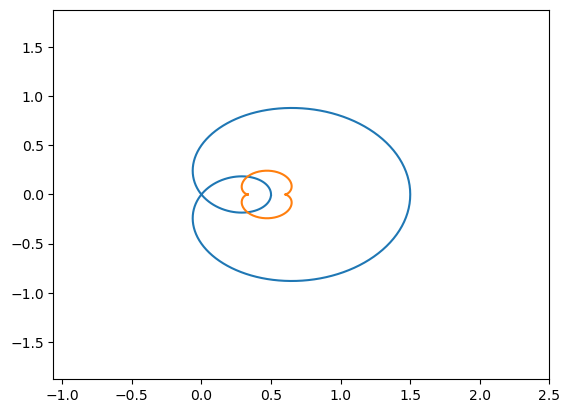

In [12]:
plt.plot(curve[:,0], curve[:,1])
plt.plot(evolute_curve[:,0], evolute_curve[:,1])
plt. xlim(float(min(curve[:,0])) - 1, float(max(curve[:,0])) + 1)
plt. ylim(float(min(curve[:,1])) - 1, float(max(curve[:,1])) + 1)

## Rotation Index

In [13]:
rotation_index(X,t0,t1)

2.0